# The Effect of the COVID-19 Pandemic on Death

As COVID-19 continues to cause significant numbers of deaths across the globe, one of the greatest talking points during the last few years has become the effect of the pandemic on our mental health, as well as the fluctuations of death numbers of various causes. The US Department of Health & Human Services keeps data for death counts for several different causes, separated by month, stretching from 2014 to 2023. In this project I will be analyzing the data and answering a few questions that are of special interest to me.

Disclaimer: The data do not discriminate by any demographic. As such, I will not be able to answer questions that are demographic-based, such as "Do younger people commit suicide more often?"

In [27]:
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

import pandas as pd
import numpy as np
import seaborn as sns
import itertools

## Importing our Data

The data are split into two sets - one from 2014-2019, and another from 2020-2023.

In [4]:
death_14_19 = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv', encoding='utf-8')
death_20_23 = pd.read_csv('Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2023.csv', encoding='utf-8')

The first data set I will leave as is, but because I want to measure data both during the height of lockdowns in 2020 and 2021 separate from data from after that (2022 and 2023), I will be splitting the second set into two.

In [5]:
death_20_21 = death_20_23[death_20_23['Year'] <= 2021]
death_22_23 = death_20_23[death_20_23['Year'] > 2021]

So now we have three tables - one from 2014-2019, one from 2020-2021, and the third from 2022-2023. I will show the head of one of the tables just to give you an example of how the table is organized.

In [6]:
death_14_19.head(12)

,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,...,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,Accidents (Unintentional Injuries),Motor Vehicle Accidents,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,3466,4600,2815,58229,12074,11461,2572,3320,1213,4026
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,3797,4979,3005,63190,13576,12311,2754,3618,1437,4354
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,3705,4645,2755,58049,12968,12559,2734,3720,1499,4631
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,4083,4818,2769,61650,13595,14520,3034,3709,1726,6233
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,4603,5346,3138,67024,14653,14748,3010,3966,1674,5659
5,United States,2019,1,257649,237219,3580,52087,8218,10961,5720,...,4116,4740,2738,60675,13447,13988,2948,3833,1574,5519
6,United States,2014,2,211980,197001,3214,45558,6443,7315,5561,...,2873,4064,2532,50435,10780,10286,2248,3091,1050,3895
7,United States,2015,2,227047,211028,3559,46226,6809,9477,6402,...,3245,4344,2578,54374,11679,11040,2350,3215,1124,4087
8,United States,2016,2,230021,212140,3459,48258,6851,9729,5162,...,3266,4307,2553,54652,11823,12442,2820,3445,1266,5022
9,United States,2017,2,233819,215160,3511,46531,7013,10309,6657,...,3581,4317,2595,54944,11975,12994,2748,3381,1428,5619


As we can see, the causes run along the columns, and the time periods run along the rows.

## Suicide

The first objective (and foremost reason I am doing this project) is to figure out how the prevalence of suicides has changed along with the pandemic. Mental health is very important to me, and one thing that the pandemic exacerbated more than most others is the mental health struggles plaguing the younger generation today. As such, there is a level of curiosity in determining whether those struggles corresponded with higher levels of suicide, particularly in comparison to other causes of death.

Below is a block of code that will create a list of the suicide counts for each month of 2014.

In [37]:
death_14 = death_14_19[death_14_19['Year'] == 2014] # New table for just 2014
death_14.reset_index() # Resetting the indices for the created table, allowing us to iterate
suicide_14 = [] # Creating empty list
for index, row in death_14.iterrows():
    suicide_14.append(row["Intentional Self-Harm (Suicide)"]) # For loop that adds each suicide count value to our list in order
print(suicide_14) # Prints list

[3320, 3091, 3408, 3606, 3589, 3552, 3534, 4027, 4034, 3791, 3480, 3394]


Using this framework, I will do the same thing for every year up through 2023. This will allow us to have all of our suicide values in one place.

In [38]:
death_15 = death_14_19[death_14_19['Year'] == 2015]
death_15.reset_index()
suicide_15 = []
for index, row in death_15.iterrows():
    suicide_15.append(row["Intentional Self-Harm (Suicide)"])

In [39]:
death_16 = death_14_19[death_14_19['Year'] == 2016]
death_16.reset_index()
suicide_16 = []
for index, row in death_16.iterrows():
    suicide_16.append(row["Intentional Self-Harm (Suicide)"])

In [40]:
death_17 = death_14_19[death_14_19['Year'] == 2017]
death_17.reset_index()
suicide_17 = []
for index, row in death_17.iterrows():
    suicide_17.append(row["Intentional Self-Harm (Suicide)"])

In [41]:
death_18 = death_14_19[death_14_19['Year'] == 2018]
death_18.reset_index()
suicide_18 = []
for index, row in death_18.iterrows():
    suicide_18.append(row["Intentional Self-Harm (Suicide)"])

In [42]:
death_19 = death_14_19[death_14_19['Year'] == 2019]
death_19.reset_index()
suicide_19 = []
for index, row in death_19.iterrows():
    suicide_19.append(row["Intentional Self-Harm (Suicide)"])

Note: For 2020-2023 I will have to use the respective tables that they're in, rather than the one from 2014-2019.

In [43]:
death_20 = death_20_21[death_20_21['Year'] == 2020]
death_20.reset_index()
suicide_20 = []
for index, row in death_20.iterrows():
    suicide_20.append(row["Intentional Self-Harm (Suicide)"])

In [44]:
death_21 = death_20_21[death_20_21['Year'] == 2021]
death_21.reset_index()
suicide_21 = []
for index, row in death_21.iterrows():
    suicide_21.append(row["Intentional Self-Harm (Suicide)"])

In [45]:
death_22 = death_22_23[death_22_23['Year'] == 2022]
death_22.reset_index()
suicide_22 = []
for index, row in death_22.iterrows():
    suicide_22.append(row["Intentional Self-Harm (Suicide)"])

In [46]:
death_23 = death_22_23[death_22_23['Year'] == 2023]
death_23.reset_index()
suicide_23 = []
for index, row in death_23.iterrows():
    suicide_23.append(row["Intentional Self-Harm (Suicide)"])
print(suicide_23)

[4239.0, 3733.0, nan, nan, nan, nan, nan, nan, nan]


Note that suicide data for 2023 is restricted to only January and February due to the fact that the dataset stopped getting updated. This means our data for 'Post-COVID' will be our smallest sample size.

## First Chart: Suicide Numbers Over Time

This project is about much more than this, but a nice starting point for us to branch off of is simply graphing our suicide counts by year. We could do average or sum - in this case I have chosen to use sums, but averages would work well too.

In [51]:
s_tot_14 = sum(suicide_14) # Summing all values in suicide_14
s_tot_15 = sum(suicide_15)
s_tot_16 = sum(suicide_16)
s_tot_17 = sum(suicide_17)
s_tot_18 = sum(suicide_18)
s_tot_19 = sum(suicide_19)
s_tot_20 = sum(suicide_20)
s_tot_21 = sum(suicide_21)
s_tot_22 = sum(suicide_22)

[42826, 44193]


We are not aggregating 2023 because, again, we only have data for January and February. So unfortunately we can only go up to 2022 for this graph.

Text(0, 0.5, 'Suicide Total')

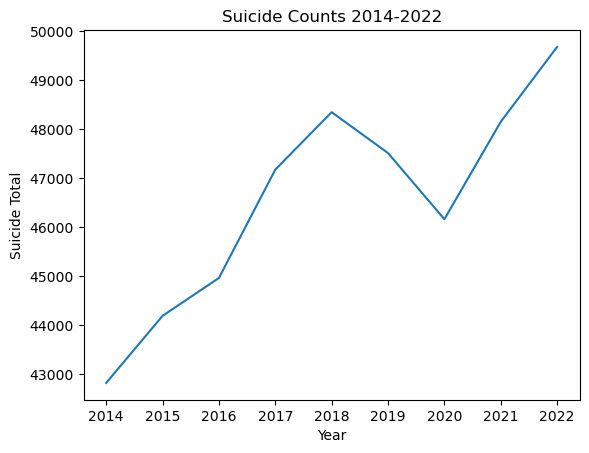

In [57]:
s_tot_all = [s_tot_14, s_tot_15, s_tot_16, s_tot_17, s_tot_18, s_tot_19, s_tot_20, s_tot_21, s_tot_22] #List of combined suicide counts for each year
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
plt.plot(years, s_tot_all)
plt.title("Suicide Counts 2014-2022")
plt.xlabel("Year")
plt.ylabel("Suicide Total")

There are some notable things I would like to dive into on a month-to-month basis, including what real-life events corresponded with the meteoric rise in suicides in 2017 and 2018, as well as the dip of 2020, which is likely due to COVID-19 being responsible for an outsized portion of deaths compared to other years. 

Text(0, 0.5, 'Suicides')

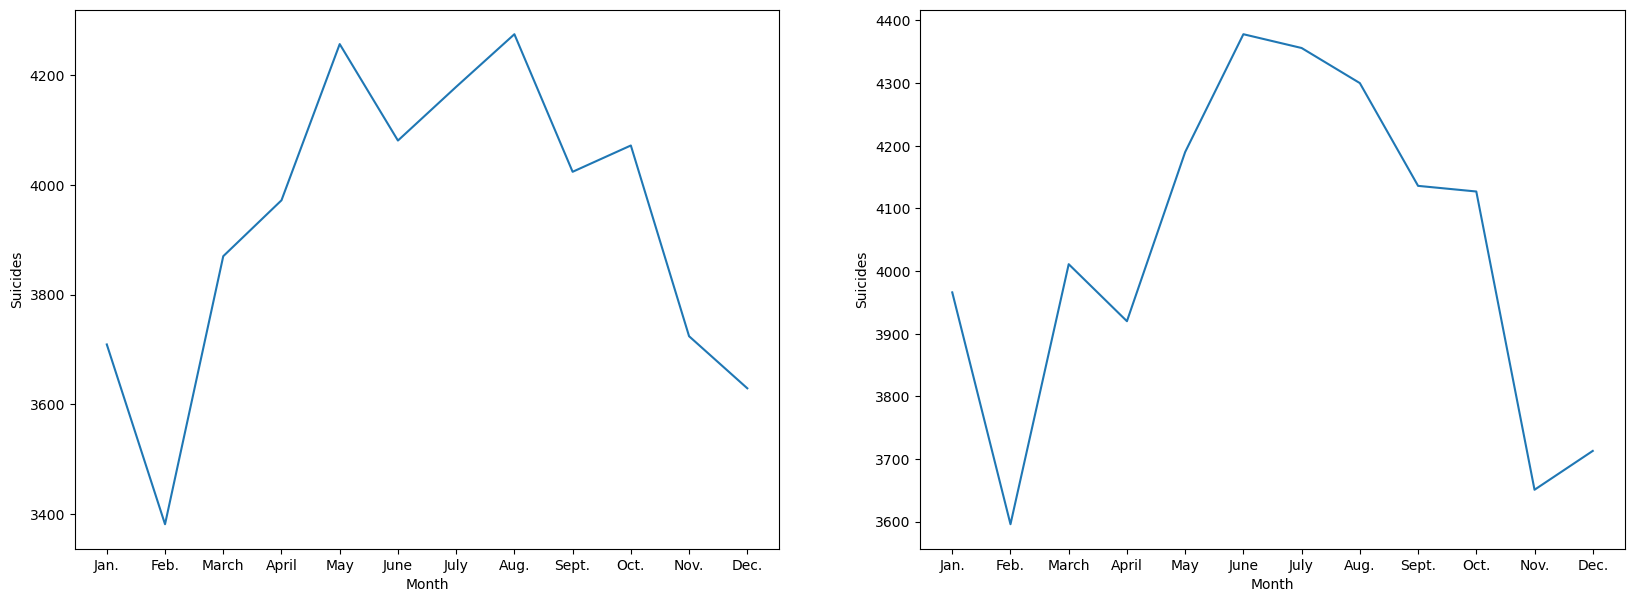

In [67]:
months = ["Jan.", "Feb.", "March", "April", "May", "June", "July", "Aug.", "Sept.", "Oct.", "Nov.", "Dec."]
fig, axs = plt.subplots(1, 2, figsize=(20,7))
axs[0].plot(months, suicide_17)
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Suicides')

axs[1].plot(months, suicide_18)
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Suicides')

These two months vizualize a stark trend that is completely unexpected to me - for both years, suicides peaked in the summer.